# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
183150,2021-week_45,AD00J0DYJ0,Extreme DA,US,yes,NaN,Yield,DNNY
80120,2021-week_38,AD08F7Y8MF,iDreamsky Technology,IN,yes,NaN,Qality,UserPopQ
13811,2021-week_33,AD098FPD67,Sensor Tower,US,yes,NaN,Yield,DNNY
256424,2021-week_50,AD07V9V8TY,Extreme DA,US,yes,NaN,Yield,DNNY
113898,2021-week_40,AD00DI8888,iDreamsky Technology,US,yes,NaN,Qality,RNNQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

## Answers


### Data Modifications Solution

#### Q1

In [4]:
ad_recs_annotated.sample(5)
print(ad_recs_annotated.shape)

#1 sample year
ad_recs_annotated['year'] = ad_recs_annotated.week_id.apply(lambda w: w.split('-')[0])


(373788, 8)


#### Q2

In [5]:
#2 sample quarter
ad_recs_annotated['quarter'] = ad_recs_annotated.week_id.apply(lambda w: int(w.split('_')[1]) // 13 + 1)


#### Q3

In [6]:
#3 Success 0/1
ad_recs_annotated['is_success_int'] = ad_recs_annotated.is_success.map({'yes': 1, 'no': 0})


#### Q4

In [7]:
#4 NaN in is_sever
print("Is sever NaN :\n", ad_recs_annotated['is_sever'].isna().sum())
#opt 2 ad_recs_annotated['is_sever'].isna().value_counts()
ad_recs_annotated['is_sever_2'] = ad_recs_annotated['is_sever'].fillna(False)
print(ad_recs_annotated['is_sever_2'].isna().value_counts())


Is sever NaN :
 304195
False    373788
Name: is_sever_2, dtype: int64


#### Q5


In [8]:
#5 capitize first letter is_success
ad_recs_annotated.is_success = ad_recs_annotated.is_success.str.title()
## add week number for later usage
ad_recs_annotated['week'] = ad_recs_annotated.week_id.str.slice(start=10)

ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week
50554,2021-week_36,AD08LNJA8I,Search Million Culture,IN,No,False,Qality,UserPopQ,2021,3,0,False,36
46913,2021-week_36,AD07SK8K9R,Fancy,GB,Yes,NaN,Qality,DNNQ,2021,3,1,False,36
22489,2021-week_34,AD088VD878,Search Million Culture,IN,Yes,NaN,Yield,RuleBasedY,2021,3,1,False,34
224585,2021-week_48,AD088GAQL8,RelayFoods,JP,Yes,NaN,Qality,UserPopQ,2021,4,1,False,48
49795,2021-week_36,AD08W88VX7,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021,3,1,False,36


### Subset selection Solution

#### Q1

In [9]:
#request in US region
print("Requests in US opt 1 :\n", ad_recs_annotated[ad_recs_annotated["region"].isin(["US"])].region.count())
print("Requests in US opt 2 :\n", ad_recs_annotated[ad_recs_annotated.region == 'US'].region.count())

Requests in US opt 1 :
 103846
Requests in US opt 2 :
 103846


#### Q2

In [10]:
#2 How many **successful** requests are there in US region? 
print(ad_recs_annotated[(ad_recs_annotated.region == 'US') & 
                        (ad_recs_annotated.is_success == 'Yes')].shape)

print(ad_recs_annotated.query('region == "US" and is_success == "Yes"').shape)

(88918, 13)
(88918, 13)


#### Q3

In [11]:
#3 How many **successful** requests are there in US region, on week 52?
print(ad_recs_annotated.query('region == "US" and is_success == "Yes" and week == "52"').shape)

(3342, 13)


#### Q4

In [12]:
#4 How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
print(ad_recs_annotated.query('rec_provider == "DNNQ" or rec_provider == "RNNY" or rec_provider == "UserPopQ"').shape)

(200093, 13)


#### Q5

In [13]:
#5 How many requests where delivered by rule based providers?
print(ad_recs_annotated.rec_provider.value_counts()) #just to check how to enter rule based
print(ad_recs_annotated.query('rec_provider == "RuleBased"').shape)

#other option in case Rule based Y should also be counter
print(ad_recs_annotated.query('rec_provider.str.contains("RuleBased")', engine='python').shape)


DNNQ                 117424
UserPopQ              69937
DNNY                  45116
UserPopY              38600
RuleBasedY            28154
RNNQ                  20983
ManualQ               13844
RNNY                  12732
XGBQ                  12250
XGBY                   4276
BooksY                 4150
UserPopSelectionQ      2417
ManualY                1982
BooksQ                 1720
RuleBased               182
UserPopSelectionY        21
Name: rec_provider, dtype: int64
(182, 13)
(28336, 13)


#### Q6

In [14]:
#6 Select only the requests from 2021 - How many are there?

print(ad_recs_annotated.year.value_counts()) #just for testing

print(ad_recs_annotated.query('year == "2021"').shape)



2021    271615
2022    102173
Name: year, dtype: int64
(271615, 13)


#### Q7

In [15]:
#7 Select the reqeusts from week 30 to week 40 - How many are there?
print(ad_recs_annotated.query('week >= "30" and week <= "40"').shape)

(115051, 13)


#### Q8

In [16]:
#8 Select all the data that comes from the most popular Ad
most_popular_add = ad_recs_annotated['ad_id'].value_counts().idxmax()
print(ad_recs_annotated['ad_id'].value_counts().max())
ad_recs_annotated.query('ad_id == @most_popular_add').sample(2) #print 2 out of 247 with this ad

247


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week
120942,2021-week_41,AD07PFFMP9,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2021,4,1,False,41
363529,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,False,52


#### Q9

In [17]:
#9 Select all the data that comes from the least popular provider
least_popular_provider = ad_recs_annotated['rec_provider'].value_counts().idxmin()
print("Lease popular privider :\n", least_popular_provider)
ad_recs_annotated.query('rec_provider == @least_popular_provider').sample(2) #print 2 out of 21 with this provider



Lease popular privider :
 UserPopSelectionY


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,06
352896,2022-week_06,AD009PDCHK,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,06


#### Q10

In [18]:
#10 Select the data in which is_sever is None. How big is it?
x = ad_recs_annotated.is_sever.isnull()
x.sum()
ad_recs_annotated[x].sample(2)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week
187072,2021-week_46,AD0008IX8A,iDreamsky Technology,DE,Yes,NaN,Qality,UserPopQ,2021,4,1,False,46
283915,2022-week_01,AD08JTPHF8,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,1,False,01


#### Q11

In [19]:
#11 Select the data in which the requester is a 3 word company
ad_recs_annotated['req_number_of_words'] = ad_recs_annotated.requester.apply(lambda x: len(x.split()))
ad_recs_annotated.query('req_number_of_words == 3').sample(2) #print sample


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week,req_number_of_words
74414,2021-week_38,AD07ZR88TR,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2021,3,1,False,38,3
253101,2021-week_50,AD098MW98C,MoJoe Brewing Company,IN,Yes,NaN,Yield,RuleBasedY,2021,4,1,False,50,3


#### Q12

In [20]:
#12 Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
add_with_6 = ad_recs_annotated.ad_id.apply(lambda x: '6' in x)
req_number_of_words2 = ad_recs_annotated.requester.apply(lambda x: len(x.split()))
ad_recs_annotated[(add_with_6) & (req_number_of_words2 == 3)].sample(3)


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week,req_number_of_words
310442,2022-week_03,AD08KJ6SF8,Search Million Culture,JP,Yes,NaN,Qality,DNNQ,2022,1,1,False,03,3
276289,2022-week_01,AD088886Y8,Search Million Culture,GB,Yes,NaN,Qality,XGBQ,2022,1,1,False,01,3
287017,2022-week_02,AD00T8HWV6,Search Million Culture,DE,Yes,NaN,Qality,UserPopQ,2022,1,1,False,02,3


#### Q13

In [21]:
import re as re
def find_number(text):
    total = 1
    num = re.findall(r'[0-9]+',text)
    for i in num:
        total = total * int(i)   
#    return "".join(num)
    return total
ad_recs_annotated['x']= ad_recs_annotated['ad_id'].apply(lambda x: find_number(x))
ad_recs_annotated.sample(5)

ad_id_mult_30 = ad_recs_annotated.ad_id.apply(lambda x: find_number(x) > 30)  
ad_recs_annotated[(req_number_of_words2 == 3) & (ad_id_mult_30)].sample(5)


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week,req_number_of_words,x
32043,2021-week_35,AD08NW9QCF,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2021,3,1,False,35,3,72
252621,2021-week_50,AD088SRXTP,MoJoe Brewing Company,IN,Yes,NaN,Yield,RuleBasedY,2021,4,1,False,50,3,88
107127,2021-week_40,AD08SQSWD7,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021,4,1,False,40,3,56
87923,2021-week_39,AD08N88GW6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False,39,3,4224
65743,2021-week_37,AD089T7LGR,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021,3,1,False,37,3,623


### Analysis answers

#### Q1

In [22]:
#1 How many weeks available in the data? Are there any missing weeks? 
#weeks in data
import datetime
weeks_in_data = ad_recs_annotated.week_id.nunique()
print("Number of weeks in data : ", weeks_in_data)

#missing weeks
new = ad_recs_annotated.filter(['week_id','week','year'], axis=1).drop_duplicates()
new['year_week'] = new['year'] + new['week']

first_week = new.year_week.min()
last_week = new.year_week.max()
print("first week - ",first_week)
print("last week - ",last_week)

first_date = datetime.datetime.strptime(first_week + '-1', "%Y%W-%w")
print("first date - ", first_date)

last_date = datetime.datetime.strptime(last_week + '-1', "%Y%W-%w")
print("last date - ", last_date)

day_diff = last_date - first_date
print("day dif - ",day_diff)
weeks_dif = (last_date - first_date) / 7
weeks_dif = weeks_dif.days
print("weeks dif - ", weeks_dif)
missing_weeks = weeks_dif - weeks_in_data
print("missing weeks - ", missing_weeks) #45 missing weeks


Number of weeks in data :  26
first week -  202133
last week -  202252
first date -  2021-08-16 00:00:00
last date -  2022-12-26 00:00:00
day dif -  497 days, 0:00:00
weeks dif -  71
missing weeks -  45


#### Q2

In [23]:
#2 How many regions available in the data? Are there any missing weeks per region? 
#regions_in_data = ad_recs_annotated.region.nunique()
print("Number of regions in data : ", ad_recs_annotated.region.nunique())

#missing weeks per region
print (ad_recs_annotated.groupby('region')['week_id'].nunique())


Number of regions in data :  5
region
DE    26
GB    26
IN    26
JP    25
US    26
Name: week_id, dtype: int64


#### Q3

In [24]:
#3 How many ads are being sent to annotation in each region per week?

ad_recs_annotated.groupby(by=['region', 'week_id']).ad_id.count()

region  week_id     
DE      2021-week_33    2395
        2021-week_34    2360
        2021-week_35    2393
        2021-week_36    2401
        2021-week_37    2404
                        ... 
US      2022-week_03    3979
        2022-week_04    3999
        2022-week_05    3998
        2022-week_06    3992
        2022-week_52    3998
Name: ad_id, Length: 129, dtype: int64

#### Q4

In [25]:
#4 How many None values are there in is_sever column? 
print("is sever None values - ",ad_recs_annotated.is_sever.isna().sum())

is sever None values -  304195


#### Q5

In [29]:
#5 Are ads being sent more than one time in a given week?
#what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_week_count = ad_recs_annotated.groupby(by=['ad_id', 'week_id']).week_id.count()
ad_week_count.sample(5)
print("ads sent more than once per week - ",ad_week_count[ad_week_count.apply(lambda x: x>1)].count())

#add sent most time
ad_week = ad_week_count.idxmax()
print(ad_week)

maxweek = ad_week_count.max()


ads sent more than once per week -  9176
('AD098SWYF6', '2021-week_40')


#### Q6

In [37]:
#6 Are there ads that are being sent in more than one week?
#   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
#   2. What are the weeks that the ad from above was sent in? 
#   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

#Ads sent more that 
ad_mul_week = ad_recs_annotated.groupby(by='ad_id').week_id.nunique() 
print(ad_mul_week.apply(lambda x: x>1).value_counts())   #31441 weeks

#Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
#add sent most time
ad_week = ad_mul_week.idxmax()
print("ad sent most times: \n", ad_week)
maxweek = ad_mul_week.max()
print("week of ad sent most times: \n", maxweek)

#Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
print("Ad that was succsefull in one week, but not succesfful in a different week:")
ad_recs_annotated[ad_recs_annotated.groupby(by=['ad_id', 'week_id'])['is_success_int'].transform('nunique') > 1].sample(1)

False    269286
True      31441
Name: week_id, dtype: int64
ad sent most times: 
 AD079VP6DH
week of ad sent most times: 
 26
Ad that was succsefull in one week, but not succesfful in a different week:


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_2,week,req_number_of_words,x
341857,2022-week_05,AD88888888,Extreme DA,US,Yes,NaN,Yield,BooksY,2022,1,1,False,05,2,88888888


#### Q7

In [38]:
#7 When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? 
#What do you learn from it about the reason for Nones in the first place?
print(ad_recs_annotated.groupby(by=['is_sever', 'is_success'], dropna=False).is_success.count())
#when is_sever is NaN, only 6 are not sucessful and 304,189 are sucessful
#in compare to records when the is_sever was checked in which there are 24889+44677 -> 69566 non sucessful and only 17 sucessful
#it looks like mainily when there is no sucess with the ad the system checks if the reason was becase the ad we "sever"

is_sever  is_success
False     No             24899
          Yes                5
True      No             44677
          Yes               12
NaN       No                 6
          Yes           304189
Name: is_success, dtype: int64


#### Q8

In [39]:
#8 Per each region, What is the Quality/Yield traffic proportion WoW?
ad_recs_annotated.groupby(['region','week_id']).recommendation_type.value_counts().unstack().apply(lambda r:r['Qality']/r['Yield'], axis=1).rename('Qality/Yield Ratio')

region  week_id     
DE      2021-week_33    3.917864
        2021-week_34    5.129870
        2021-week_35    3.406998
        2021-week_36    4.076110
        2021-week_37    3.722986
                          ...   
US      2022-week_03    0.511778
        2022-week_04    0.571934
        2022-week_05    0.535920
        2022-week_06    0.582243
        2022-week_52    0.481289
Name: Qality/Yield Ratio, Length: 129, dtype: float64

#### Q9

In [40]:
#9 How many different reqeusters are there?
ad_recs_annotated.requester.nunique()

36

#### Q10

In [43]:
#10 Which are the top 5 requesters per region?
ad_recs_annotated.groupby('region').requester.value_counts().groupby(level=0).head(5)


region  requester             
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

#### Q11

In [44]:
#11 Which are the different rec_proivders?
ad_recs_annotated.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### Q12

In [45]:
#12 Are there different rec providers per region?
print(ad_recs_annotated.groupby(by=['region'], dropna=False).rec_provider.unique())
#yes


region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
Name: rec_provider, dtype: object


#### Q13

In [46]:
#13 Are there different rec providers per rec type?
print(ad_recs_annotated.groupby(by=['recommendation_type'], dropna=False).rec_provider.unique())
#yes

recommendation_type
Qality    [DNNQ, BooksQ, UserPopQ, ManualY, ManualQ, XGB...
Yield     [DNNY, UserPopY, RuleBasedY, BooksY, ManualY, ...
Name: rec_provider, dtype: object


#### Q14

In [47]:
#14 What are the notation rules distinguishing between quality vs yielding providers?
ad_recs_annotated.groupby(by=['recommendation_type', 'rec_provider'], dropna=False).is_success.count()
#when req provided ends with Q the recommendation type is mainly Qality
#when req provided ends with Y the recommendation type is mainly Yield
#the exception is for rec_provide Manual

recommendation_type  rec_provider     
Qality               BooksQ                 1720
                     DNNQ                 117424
                     ManualQ               10220
                     ManualY                1439
                     RNNQ                  20983
                     RuleBased               182
                     UserPopQ              69937
                     UserPopSelectionQ      2417
                     XGBQ                  12250
Yield                BooksY                 4150
                     DNNY                  45116
                     ManualQ                3624
                     ManualY                 543
                     RNNY                  12732
                     RuleBasedY            28154
                     UserPopSelectionY        21
                     UserPopY              38600
                     XGBY                   4276
Name: is_success, dtype: int64

#### Q15

In [48]:
#15 Which is the most successful region of operation?
#by success count
ad_recs_annotated.groupby(by=['region'], dropna=False).is_success.count().sort_values(ascending=False).head(1)
#result is US


region
US    103846
Name: is_success, dtype: int64

#### Q16

In [49]:
#16 Which is the most successful rec provider per each region?
ad_recs_annotated.groupby(by=['region', 'rec_provider']).is_success.value_counts().groupby(level=0).head(1)


region  rec_provider  is_success
DE      BooksQ        Yes            1082
GB      DNNQ          Yes           34681
IN      ManualQ       Yes            5041
JP      DNNQ          Yes           20113
US      BooksQ        Yes             357
Name: is_success, dtype: int64

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [51]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

In [177]:
import glob, os

In [227]:
path='./data/weekly/'
filenames = glob.glob(path + "/*.csv")

#dfsample = []
#dfqulity = []
#dfyield = []
#dfresult = []

samplefiles = glob.glob(path + '*?Sample.csv')
qualityfiles =  glob.glob(path + '*?Qality*.csv')
yeildfiles =  glob.glob(path + '*?Yield*.csv')


dfsample1 = pd.concat([pd.read_csv(fp).assign(file_name=os.path.basename(fp)) for fp in samplefiles])
dfqulity1 = pd.concat([pd.read_csv(fp).assign(file_name=os.path.basename(fp)) for fp in qualityfiles])
dfqulity1['recommendation_type']='Qality'    
dfyield1 = pd.concat([pd.read_csv(fp).assign(file_name=os.path.basename(fp)) for fp in yeildfiles])
dfyield1['recommendation_type']='Yield'

dfresult1 = pd.concat([dfyield1, dfqulity1], ignore_index=True)
dfresult1['week_id'] = file_name[14:19]+'-week'+file_name[19:20]
         
##need to add week_id to result df
dfresult1['week_id'] = weekly_files[0][:4]+'-week_'+weekly_files[0][4:7]

#left join
#the sample has a few more records that needs to be checked.
dfresultall =  pd.merge(dfsample1, dfresult1, how="left", on=["week_id","region","ad_id"])
dfresultall.sample(5)


,week_id,ad_id,requester,region,recommendation_type_x,rec_provider,file_name_x,is_success,is_sever,file_name_y,recommendation_type_y
93238,2021-week_39,AD06X8QGL8,Search Million Culture,IN,Qality,UserPopQ,2021_39_IN__Sample.csv,NaN,NaN,NaN,NaN
158338,2021-week_44,AD00JUVQGW,RelayFoods,DE,Qality,DNNQ,2021_44_DE__Sample.csv,NaN,NaN,NaN,NaN
176082,2021-week_45,AD008P0KS,Fry Multimedia,GB,Qality,DNNQ,2021_45_GB__Sample.csv,NaN,NaN,NaN,NaN
64189,2021-week_37,AD098RR69P,Search Million Culture,IN,Qality,UserPopQ,2021_37_IN__Sample.csv,NaN,NaN,NaN,NaN
189277,2021-week_46,AD088YTKC8,"OpenDesks, Inc.",GB,Yield,ManualY,2021_46_GB__Sample.csv,NaN,NaN,NaN,NaN


Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

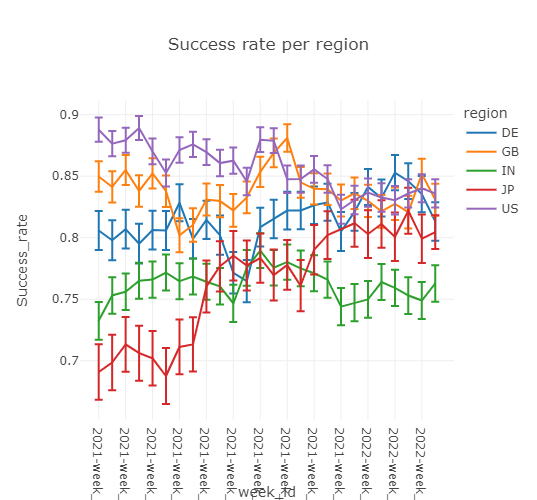

Produce the following requestser proportion graph:

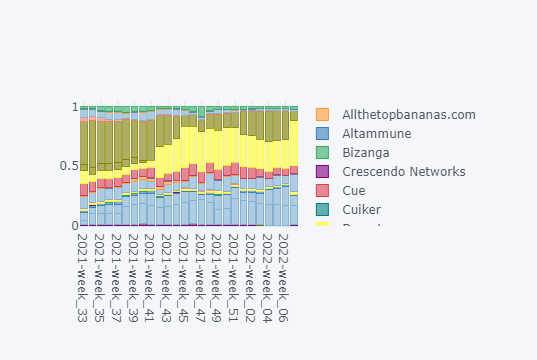

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)

In [5]:
ad_recs_annotated.week_id.nunique()

NameError: name 'ad_recs_annotated' is not defined